**Title of the Project : Pneumonia Prediction using Chest X-Ray Images with Transfer Learning Method**


**Link to the DataSet :**  https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the Neccessary Libraries required for the Dataset

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from torchvision import datasets,transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder

In [3]:
training_link = '/content/drive/MyDrive/chest_xray/train'
validation_link = '/content/drive/MyDrive/chest_xray/val'
testing_link = '/content/drive/MyDrive/chest_xray/test'

**NORMAL IMAGE**

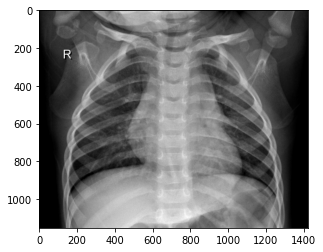

In [4]:
normal_img = plt.imread('/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0117-0001.jpeg')
plt.imshow(normal_img, cmap='gray')

**Pneumonia Image**

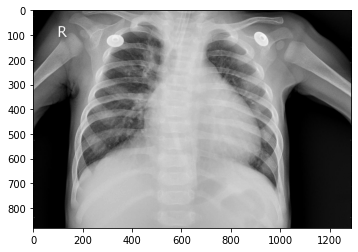

In [5]:
pneumonia_img = plt.imread("/content/drive/MyDrive/chest_xray/train/PNEUMONIA/person1298_virus_2226.jpeg")
plt.imshow(pneumonia_img,cmap='gray')

**Explanation of the image observations**

Normal lung images are more clear than the Pneumonia affected Lungs, but it is difficult to come to conclusion without any prior experience in the medical field. That's why let's build an image classifier using Transfer Learning when given an image as input it predicts whether it's Normal or Pneumonia affected Lungs

**Transfer Learning method using VGG16**

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_model = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_model = ImageDataGenerator(rescale = 1./255)

In [7]:
training_data = train_model.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5132 images belonging to 2 classes.


In [8]:
testing_data = test_model.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [9]:
IMAGE_SIZE = [224, 224]


In [10]:
#Import the Vgg 16 and add the preprocessing layer to front of the VGG16 Here we will use ImageNet  PreTrained Weights

vgg_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


No need to train the layers as they are State of Art Algorithms and
the weights are pre-trained and are modified accordingly

In [11]:
for layer in vgg_model.layers:
    layer.trainable = False

In [12]:
x = Flatten()(vgg_model.output)

In [13]:
#We use glob function to find out how many files are there in the working directory and count the number of classes they belong to.


folder_count = glob('/content/drive/MyDrive/chest_xray/train/*')

In [14]:
prediction = Dense(len(folder_count), activation='softmax')(x)

#Create a Model 
model = Model(inputs=vgg_model.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
post_run = model.fit_generator(
  training_data,
  validation_data=testing_data,
  epochs=10,
  steps_per_epoch=len(training_data),
  validation_steps=len(testing_data)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 1335s 8s/step - loss: 0.3716 - accuracy: 0.8629 - val_loss: 0.2941 - val_accuracy: 0.8926
Epoch 2/10
161/161 [==============================] - 105s 650ms/step - loss: 0.1279 - accuracy: 0.9516 - val_loss: 0.2731 - val_accuracy: 0.8958
Epoch 3/10
161/161 [==============================] - 105s 650ms/step - loss: 0.1120 - accuracy: 0.9583 - val_loss: 0.3754 - val_accuracy: 0.8878
Epoch 4/10
161/161 [==============================] - 105s 653ms/step - loss: 0.0857 - accuracy: 0.9620 - val_loss: 0.5188 - val_accuracy: 0.8590
Epoch 5/10
161/161 [==============================] - 105s 651ms/step - loss: 0.0871 - accuracy: 0.9692 - val_loss: 0.3939 - val_accuracy: 0.8862
Epoch 6/10
161/161 [==============================] - 105s 653ms/step - loss: 0.0701 - accuracy: 0.9747 - val_loss: 0.5234 - val_accuracy: 0.8686
Epoch 7/10
161/161 [==============================] - 105s 653ms/step - loss: 0.0657 - accuracy: 0.9776 - val_loss: 0.3792 - v

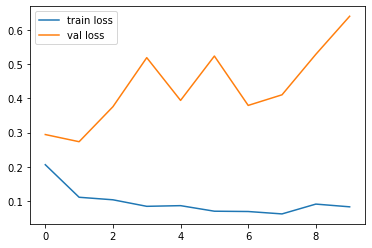

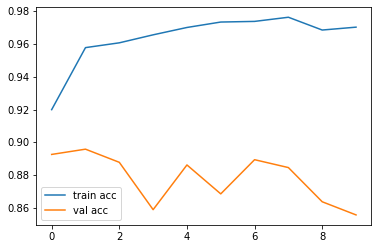

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(post_run.history['loss'], label='train loss')
plt.plot(post_run.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(post_run.history['accuracy'], label='train acc')
plt.plot(post_run.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file
from keras.models import load_model

model.save('model_vgg16.h5')

In [21]:
from keras_preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

In [22]:
model = load_model('/content/model_vgg16.h5')

In [23]:
def pred(val):
  if val[0][0] == 1:
    print("Does not have Pneumonia!")
  else:
    print("Has Pneumonia!")

In [26]:

img = image.load_img("/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg", target_size=(224,224)) 

x = image.img_to_array(img)

x = np.expand_dims(x,axis=0)

image_data = preprocess_input(x)

value = model.predict(image_data)

pred(value)

Has Pneumonia!


In [27]:

img = image.load_img("/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg", target_size=(224,224)) 

x = image.img_to_array(img)

x = np.expand_dims(x,axis=0)

image_data = preprocess_input(x)

value = model.predict(image_data)

pred(value)

Does not have Pneumonia!
